### Part 2
1. https://www.youtube.com/watch?v=bemDFpNooA8
2. https://colab.research.google.com/github/lmoroney/mlday-tokyo/blob/master/Lab2-Computer-Vision.ipynb

Fashion MNIST Dataset

In [ ]:
%pip install numpy tensorflow matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
from tensorflow import keras

2025-05-15 10:21:31.451080: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-15 10:21:31.455281: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-15 10:21:31.467757: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747304491.485629   18599 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747304491.490093   18599 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747304491.504133   18599 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print("train_images shape:", train_images.shape)
print("train_labels shape:", train_labels.shape)


train_images shape: (60000, 28, 28)
train_labels shape: (60000,)


In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


/workspaces/ai-ml-course/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-05-15 10:28:41.800931: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [17]:
# Use 'adam' optimizer and correct the loss function name
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5


2025-05-15 11:04:25.303617: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47040000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8216 - loss: 0.5221
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8315 - loss: 0.4888
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8348 - loss: 0.4859
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8371 - loss: 0.4744
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8403 - loss: 0.4758


313/313 - 0s - 1ms/step - accuracy: 0.7960 - loss: 0.5751

Test accuracy: 0.7960000038146973
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step
Predictions shape: (10000, 10)
First prediction: [3.5890311e-15 1.2788236e-10 0.0000000e+00 7.4264338e-11 1.9821596e-35
 7.2532438e-02 5.6640468e-16 4.5168638e-02 1.7694463e-10 8.8229889e-01]
Predicted class: 9
First test label: 9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 23.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


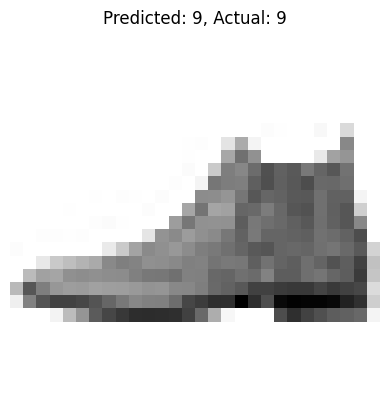

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
# Make predictions
predictions = model.predict(test_images)
print("Predictions shape:", predictions.shape)
# Print the first prediction
print("First prediction:", predictions[0])
# Print the first prediction's class
predicted_class = tf.argmax(predictions[0]).numpy()
print("Predicted class:", predicted_class)
# Print the first test label
print("First test label:", test_labels[0])
# Display the first test image
import matplotlib.pyplot as plt
plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.title(f"Predicted: {predicted_class}, Actual: {test_labels[0]}")
plt.axis('off')
plt.show()